# Calories Regression Model
# --------------------------------------
# Description:
# This notebook focuses on developing multiple types of regression models to predict
# calories burned based on user input and available data points. The model will use both
# known data and theoretical future data points when more live data is uploaded. The purpose
# is to build a predictive model for caloric expenditure that can be used in ReflexionPro
# once more live user data becomes available.
#
# Multiple regression techniques will be employed, and the model will evolve with the
# integration of live data in the future.

# Author: Darren McCauley
# Date: April 2025

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_excel("ImprovedData.xlsx", engine='openpyxl')
print(df.head())




Saving ImprovedData.xlsx to ImprovedData.xlsx
    UserID      Name Location  Total_Distance  Very_Active_Distance  \
0  7423388  Danielle      QLD            8.02                  2.03   
1  7550634     Angel      NSW            5.82                  2.28   
2  5304572    Joshua      NSW            0.11                  0.00   
3  3234489   Jeffrey      NSW            7.21                  0.00   
4  8204212      Jill      QLD            7.86                  0.34   

   Moderately_Active_Distance  Light_Active_Distance  \
0                        0.48                   5.52   
1                        0.90                   2.64   
2                        0.00                   0.11   
3                        0.34                   6.87   
4                        0.73                   6.79   

   Sedentary_Active_Distance  Very_Active_Minutes  Fairly_Active_Minutes  \
0                        0.0                   26                     10   
1                        0.0          

# Histograms of Variables

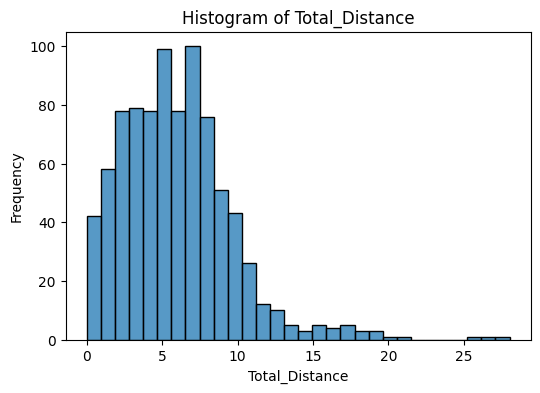

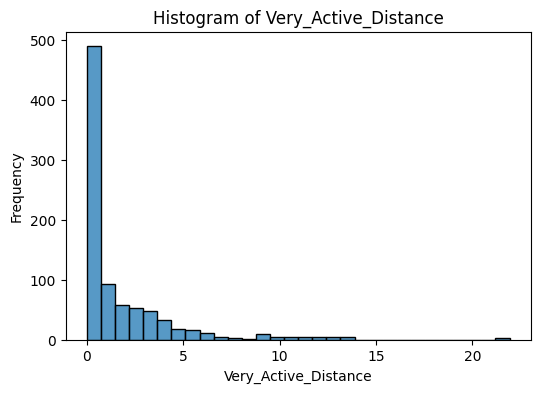

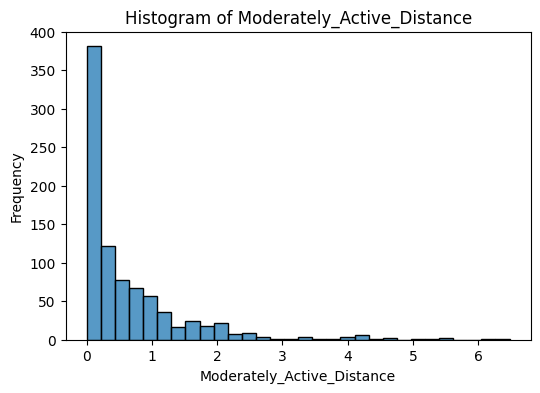

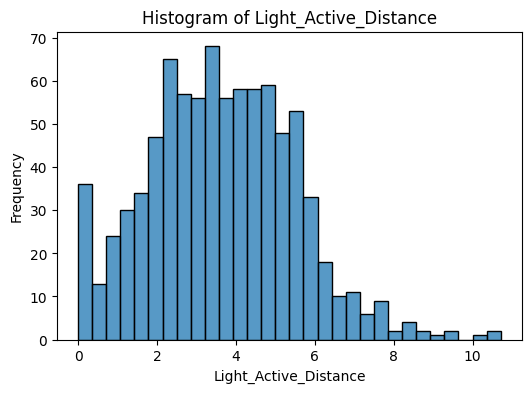

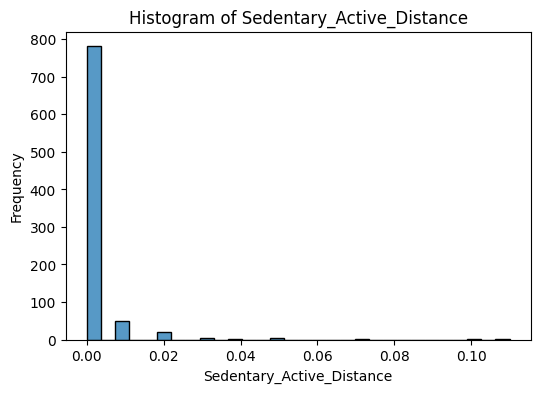

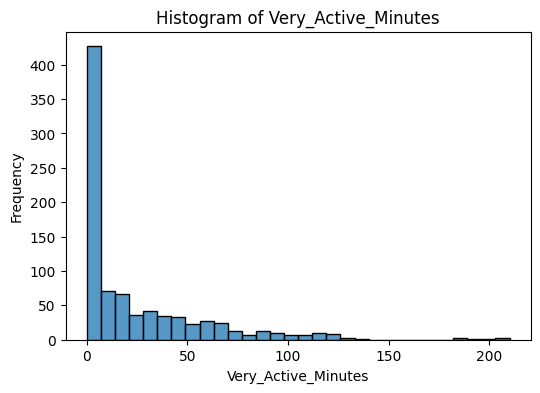

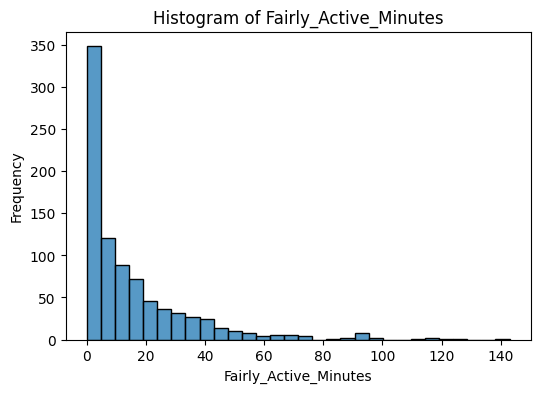

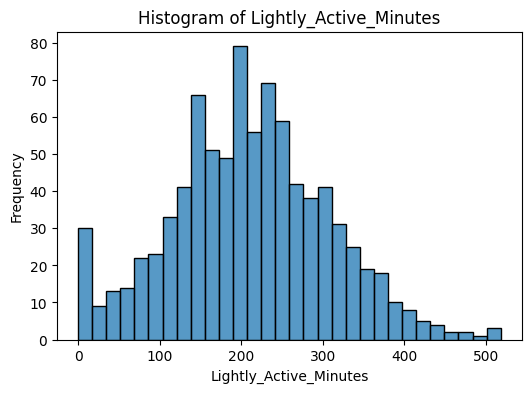

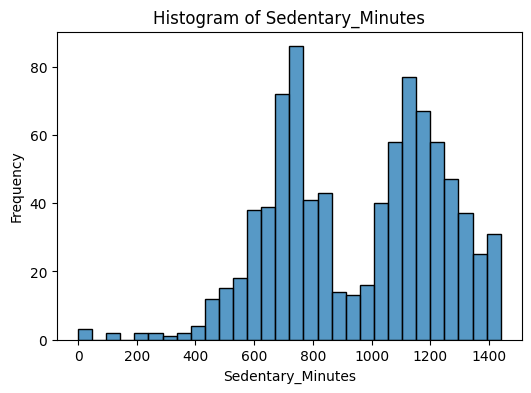

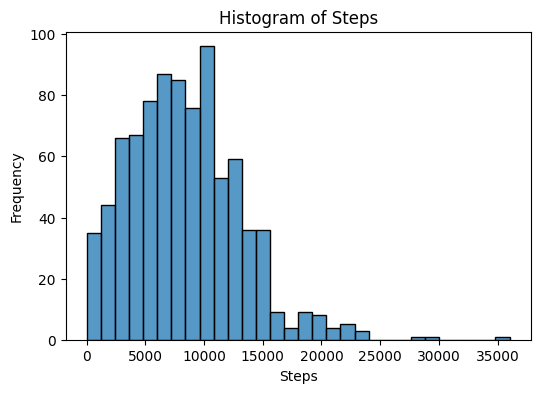

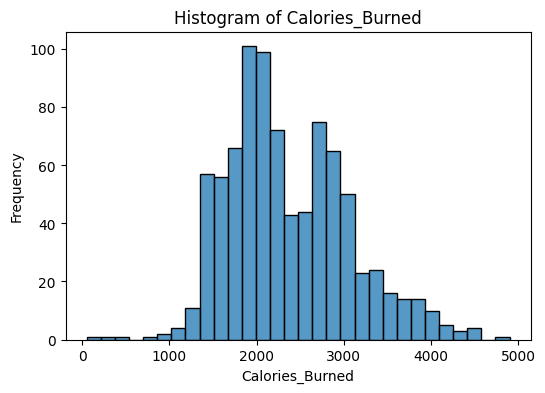

In [ ]:
import seaborn as sns

df1 = df.drop(['UserID', 'Name', 'Location'], axis=1)


for column in df1.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df1[column], bins=30, kde=False)  # `kde=False` for only histogram
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# Random Forest

Using Random Forest to predict user calories burned based on other user input.

In [ ]:
from sklearn.model_selection import train_test_split

X = df1.drop('Calories_Burned', axis=1)
y = df1['Calories_Burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (690, 10)
Testing data shape: (173, 10)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


# Linear Equation (approximation) from Random Forest
importances = rf_model.feature_importances_
intercept = np.mean(y_train - np.dot(X_train, importances))  # intercept

print("\nApproximate Linear Equation (using feature importances):")
print(f"Calories_Burned = {intercept:.2f}")
for i, feature in enumerate(X_train.columns):
    print(f"+ ({importances[i]:.2f} * {feature})")



Mean Squared Error: 125523.1205751445
R-squared: 0.7505545264895487
Mean Absolute Error: 276.53971098265896

Approximate Linear Equation (using feature importances):
Calories_Burned = 1717.49
+ (0.13 * Total_Distance)
+ (0.03 * Very_Active_Distance)
+ (0.02 * Moderately_Active_Distance)
+ (0.13 * Light_Active_Distance)
+ (0.01 * Sedentary_Active_Distance)
+ (0.41 * Very_Active_Minutes)
+ (0.05 * Fairly_Active_Minutes)
+ (0.06 * Lightly_Active_Minutes)
+ (0.10 * Sedentary_Minutes)
+ (0.06 * Steps)


Above is a potential Linear Equation based on activity to predict calories.

# Feature Importance in predicting Calories Burned

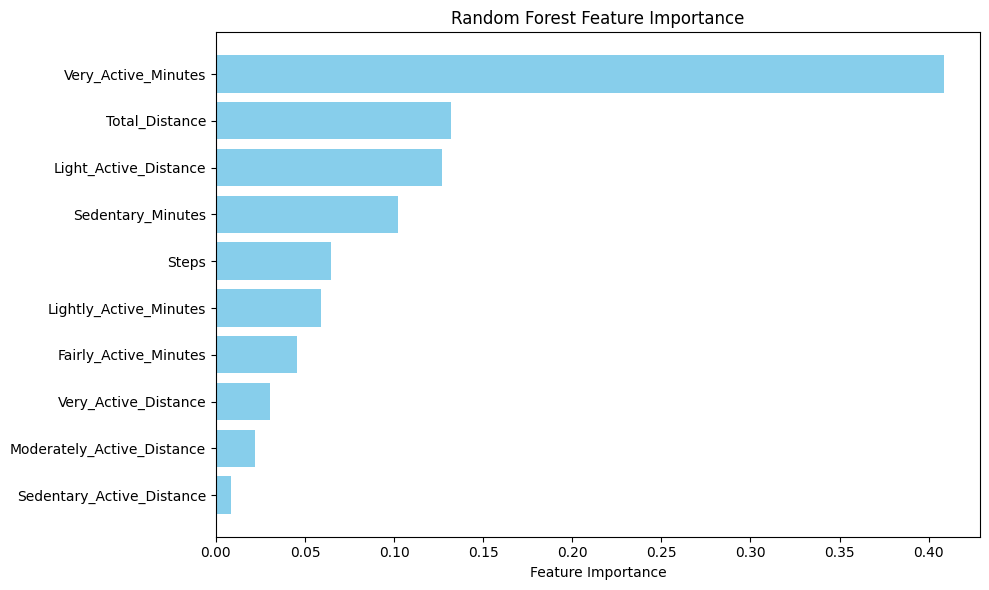

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf_model.feature_importances_
feature_names = X_train.columns

feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


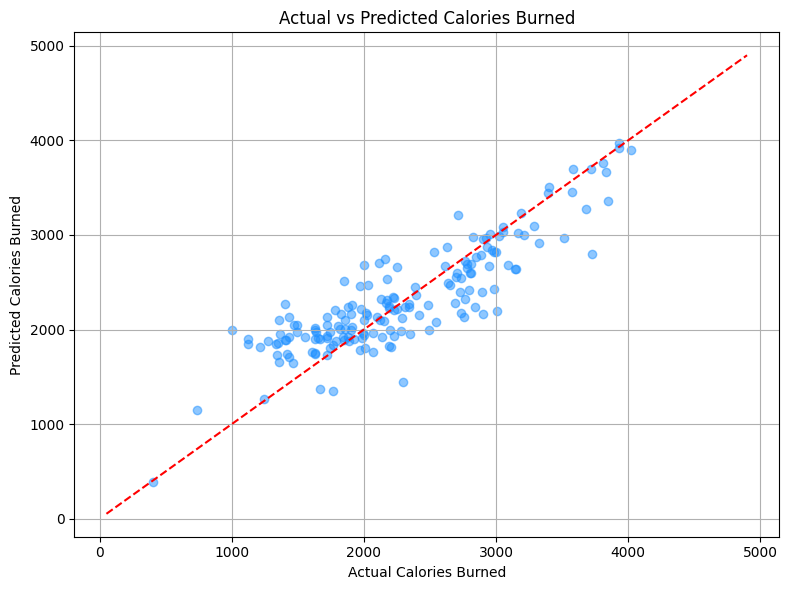

In [ ]:
y_pred = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='dodgerblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs Predicted Calories Burned")
plt.grid(True)
plt.tight_layout()
plt.show()


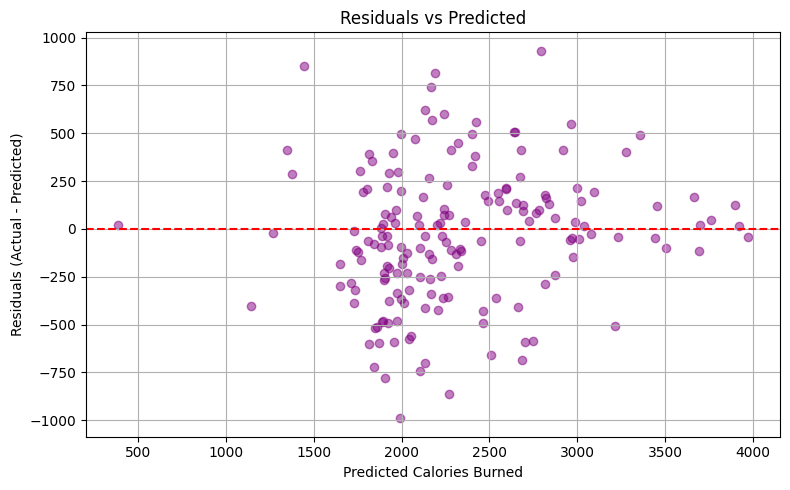

In [ ]:
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Calories Burned")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Absolute Error: 465.02
Mean Squared Error: 335291.91
R-squared: 0.334


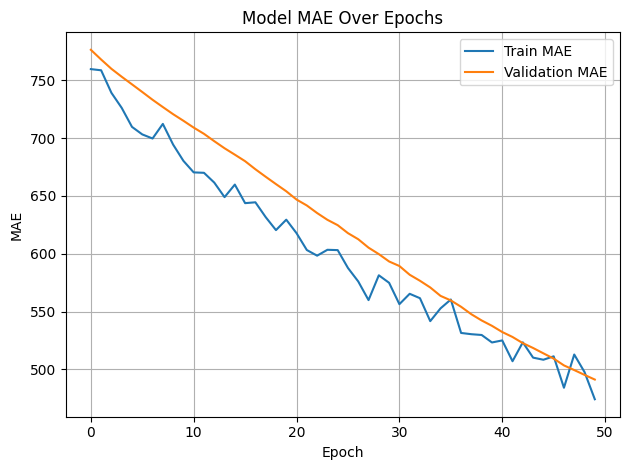

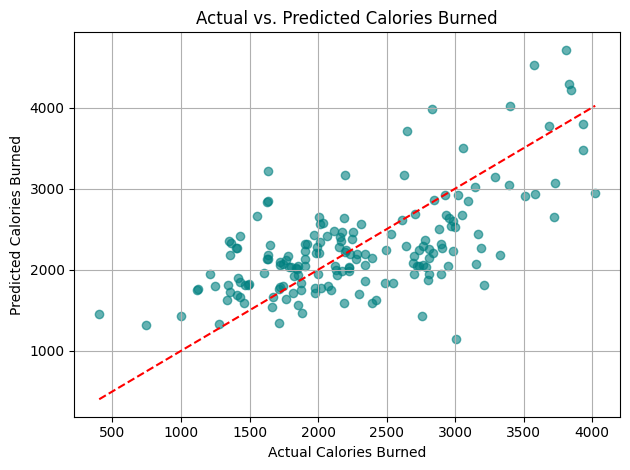

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_test_norm = (X_test - X_train.mean()) / X_train.std()

model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train_norm, y_train, epochs=20, batch_size=16, validation_split=0.2, verbose=0)

# model = keras.Sequential([
#    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#    layers.Dense(32, activation='relu'),
#    layers.Dense(1)
# ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train Model
history = model.fit(X_train_norm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Model
y_pred = model.predict(X_test_norm).flatten()
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.3f}")

# Plot MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Predicted vs. Actual Plot
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs. Predicted Calories Burned")
plt.grid(True)
plt.tight_layout()
plt.show()



Deep Learning Model produces greater prediction errors than Random Forest Regression.

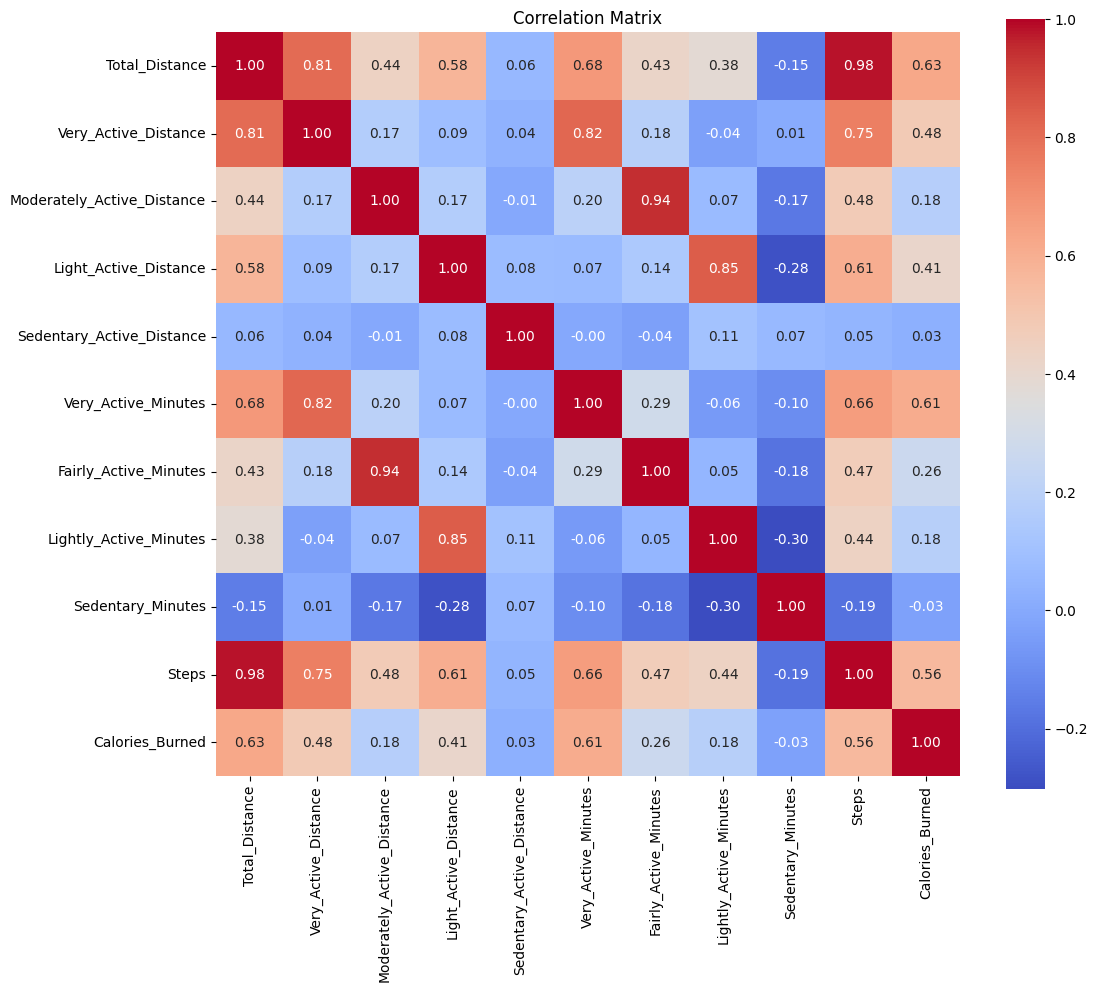

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df1.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()


# Regression Models for Calories based only on either Steps or Total Distance

In [ ]:
# Model using only Steps
X_steps = df1[['Steps']]
y = df1['Calories_Burned']
X_train, X_test, y_train, y_test = train_test_split(X_steps, y, test_size=0.2, random_state=42)

model_steps = RandomForestRegressor()
model_steps.fit(X_train, y_train)
pred_steps = model_steps.predict(X_test)
print("R2 for Steps only:", r2_score(y_test, pred_steps))

# Model using only Total_Distance
X_dist = df1[['Total_Distance']]
X_train, X_test, y_train, y_test = train_test_split(X_dist, y, test_size=0.2, random_state=42)

model_dist = RandomForestRegressor()
model_dist.fit(X_train, y_train)
pred_dist = model_dist.predict(X_test)
print("R2 for Distance only:", r2_score(y_test, pred_dist))


R2 for Steps only: 0.23514193073096146
R2 for Distance only: 0.13853603891355315


Both steps and distance are poor solo input predictors of calories burned. Steps accounts for 23.5 percent of the variance, while distance accounts for 13.9 percent of the variance.

# Comparison of both Individual Inputs as Predictors and as a combination in predicting Calories Burned.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

features = ['Steps', 'Total_Distance', 'Very_Active_Distance', 'Moderately_Active_Distance',
            'Light_Active_Distance', 'Very_Active_Minutes', 'Fairly_Active_Minutes',
            'Lightly_Active_Minutes', 'Sedentary_Minutes']

for feature in features:
    X_feature = df1[[feature]]
    y = df1['Calories_Burned']

    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    r2 = r2_score(y_test, pred)
    print(f"R² for {feature}: {r2}")

print("""
Approximate Linear Equation (using feature importances):
Calories_Burned = 1633.17
+ (0.25 * Total_Distance)
+ (0.02 * Very_Active_Distance)
+ (0.02 * Moderately_Active_Distance)
+ (0.10 * Light_Active_Distance)
+ (0.34 * Very_Active_Minutes)
+ (0.03 * Fairly_Active_Minutes)
+ (0.05 * Lightly_Active_Minutes)
+ (0.11 * Sedentary_Minutes)
+ (0.07 * Steps)
""")



R² for Steps: 0.09624174970692101
R² for Total_Distance: 0.14110845088589086
R² for Very_Active_Distance: 0.1363987766719913
R² for Moderately_Active_Distance: -0.042850541249397356
R² for Light_Active_Distance: -0.07702797470203748
R² for Very_Active_Minutes: 0.3474173584537492
R² for Fairly_Active_Minutes: 0.07996472871789462
R² for Lightly_Active_Minutes: -0.17229329412072558
R² for Sedentary_Minutes: -0.16468148783317793

Approximate Linear Equation (using feature importances):
Calories_Burned = 1633.17
+ (0.25 * Total_Distance)
+ (0.02 * Very_Active_Distance)
+ (0.02 * Moderately_Active_Distance)
+ (0.10 * Light_Active_Distance)
+ (0.34 * Very_Active_Minutes)
+ (0.03 * Fairly_Active_Minutes)
+ (0.05 * Lightly_Active_Minutes)
+ (0.11 * Sedentary_Minutes)
+ (0.07 * Steps)



Very_Active_Minutes emerged as the strongest predictor of Calories_Burned, both individually (R² = 0.35) and in the combined Random Forest model (34% of feature importance). Total_Distance was also consistently valuable. Interestingly, features like Sedentary_Minutes and Light_Active_Distance had poor individual predictive power, but still contributed meaningfully to the model, highlighting the advantage of ensemble methods like Random Forest in capturing complex relationships.


# Scatterplots of Individual Inputs and Calories Burned



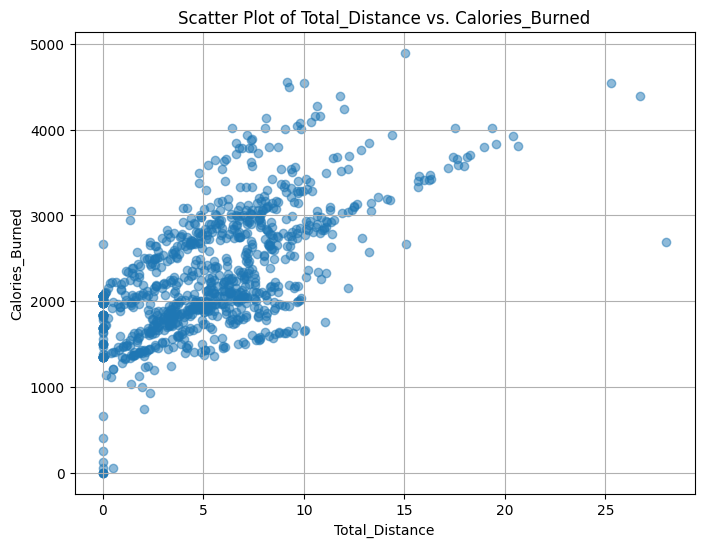

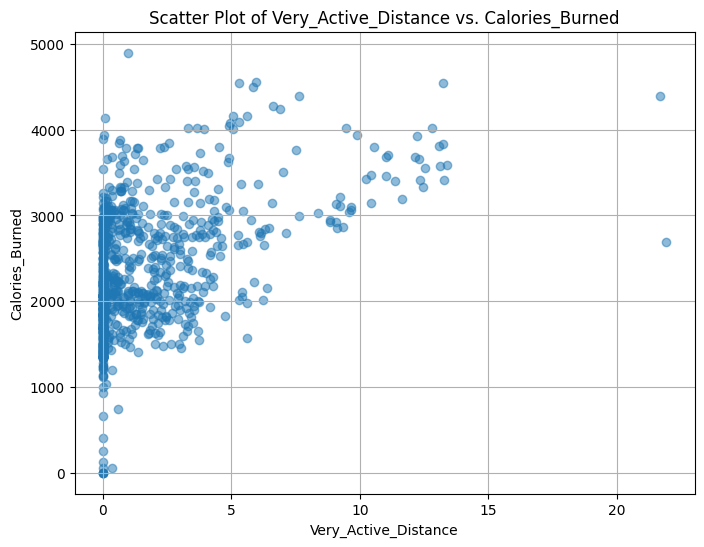

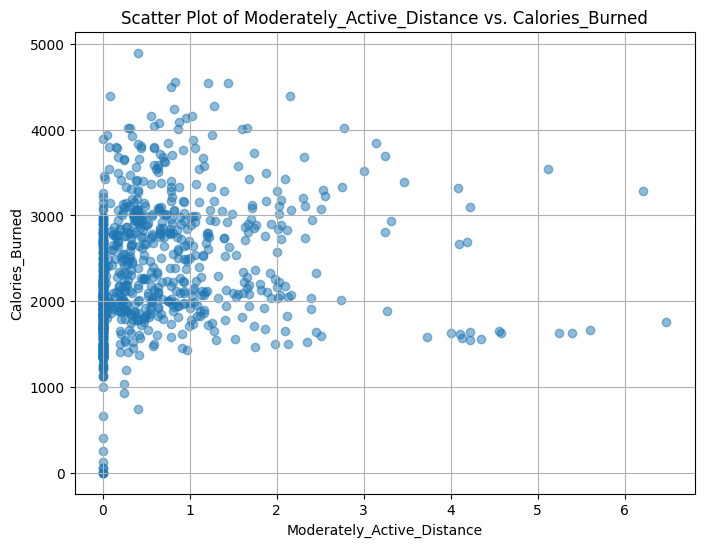

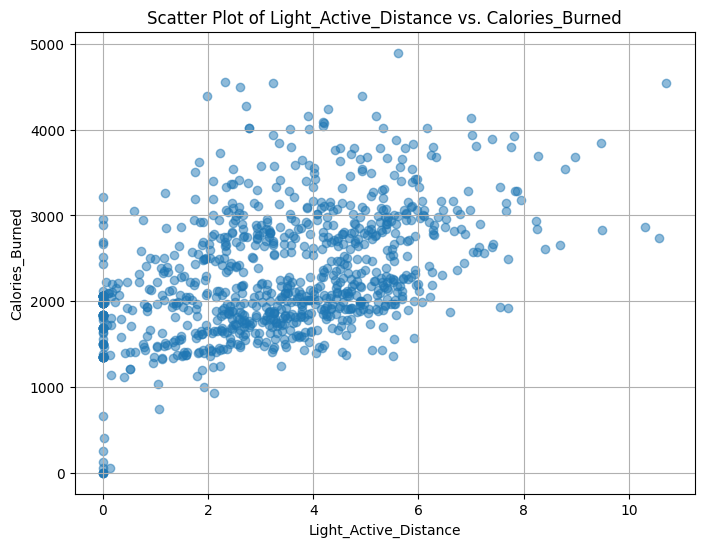

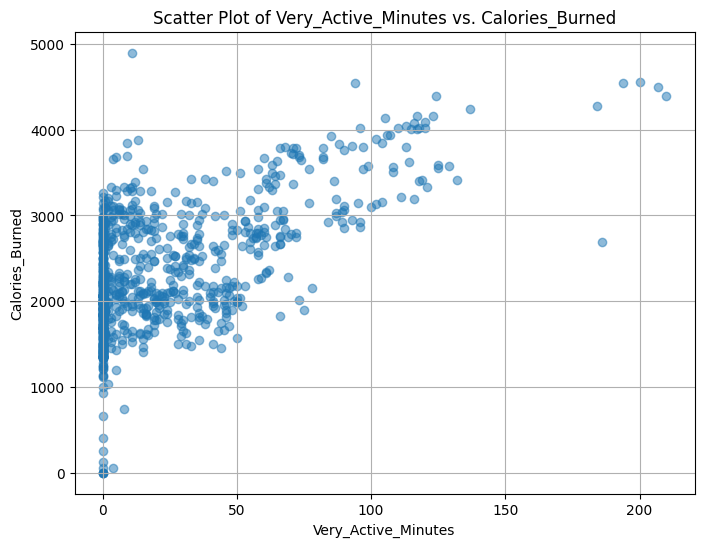

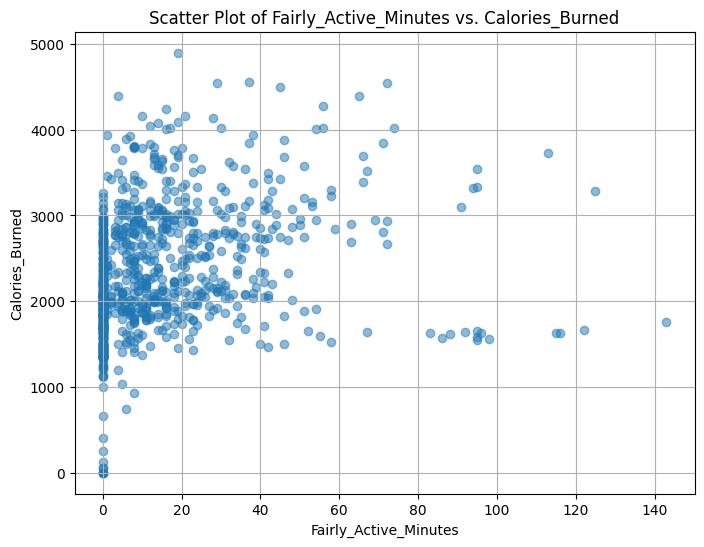

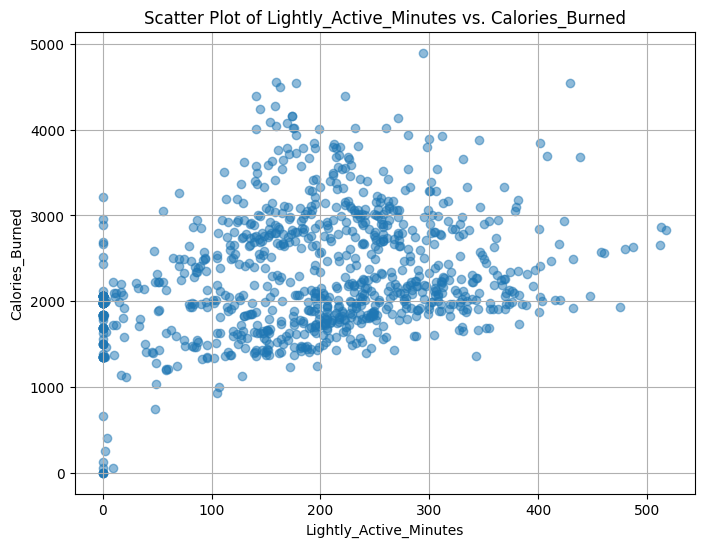

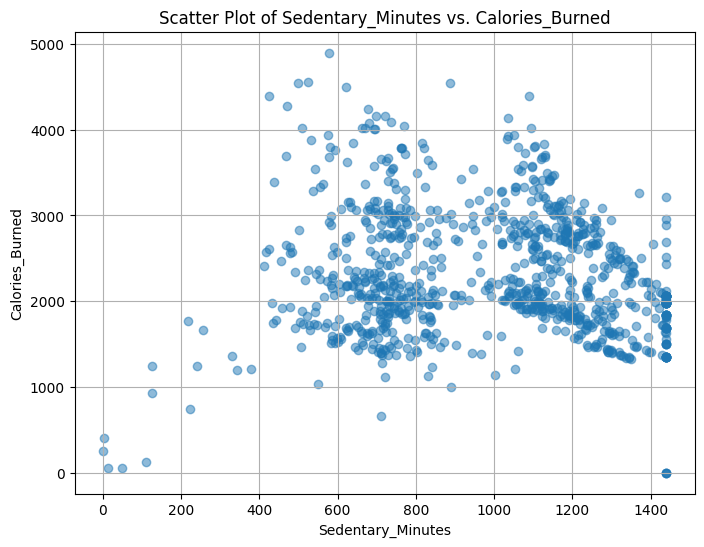

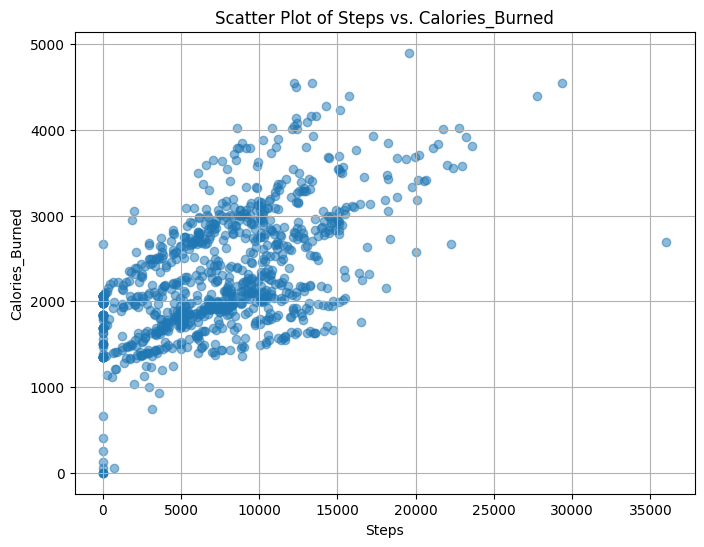

In [ ]:
for col in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[col], y, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Calories_Burned')
    plt.title(f'Scatter Plot of {col} vs. Calories_Burned')
    plt.grid(True)
    plt.show()


# Principal Component Analysis

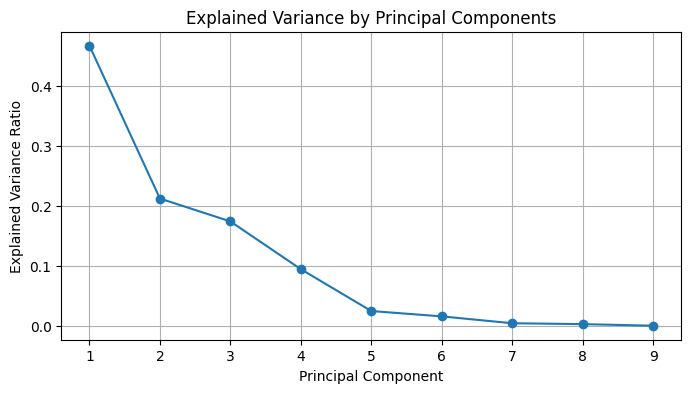

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    'Steps', 'Total_Distance', 'Very_Active_Distance',
    'Moderately_Active_Distance', 'Light_Active_Distance',
    'Very_Active_Minutes', 'Fairly_Active_Minutes',
    'Lightly_Active_Minutes', 'Sedentary_Minutes'
]
X = df1[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()



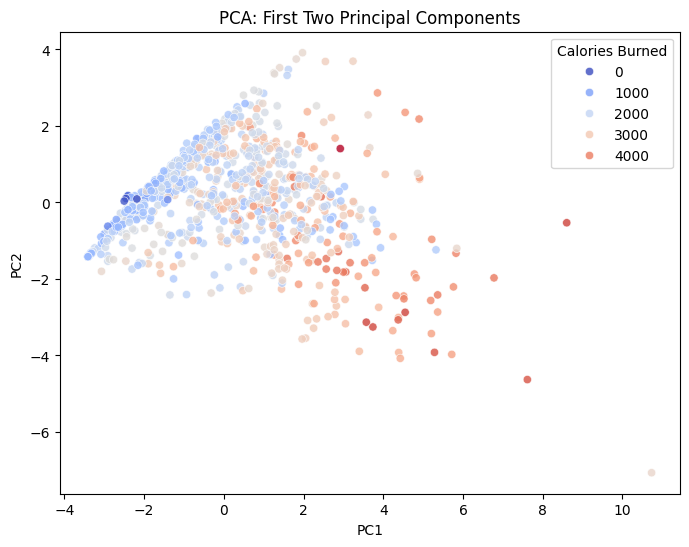

In [ ]:
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['Calories_Burned'] = df1['Calories_Burned'].values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Calories_Burned', palette='coolwarm', alpha=0.8)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Calories Burned')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
X_pca = pca.fit_transform(X_scaled)

loadings = pd.DataFrame(
    pca.components_,
    columns=features,
    index=[f'PC{i+1}' for i in range(len(features))]
)

print(loadings.T)


                                 PC1       PC2       PC3       PC4       PC5  \
Steps                       0.454859 -0.032668 -0.106803  0.119937 -0.177509   
Total_Distance              0.447966 -0.077150 -0.144071  0.132027 -0.295501   
Very_Active_Distance        0.320995 -0.432258 -0.306921 -0.042383 -0.378515   
Moderately_Active_Distance  0.283651 -0.074295  0.629989  0.097005 -0.125716   
Light_Active_Distance       0.327543  0.466430 -0.144950  0.232766  0.111028   
Very_Active_Minutes         0.314725 -0.415820 -0.219915 -0.241303  0.751744   
Fairly_Active_Minutes       0.288034 -0.105183  0.617935  0.031660  0.213814   
Lightly_Active_Minutes      0.277832  0.538978 -0.147545  0.175345  0.259933   
Sedentary_Minutes          -0.206021 -0.329531 -0.061347  0.901567  0.177096   

                                 PC6       PC7       PC8       PC9  
Steps                      -0.086712 -0.216587  0.632264 -0.529668  
Total_Distance             -0.151641  0.029654  0.184936  0.7

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)  # X is your original features, e.g., steps, distances, minutes

# Regression
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))


R² score: 0.46963170626693607


After applying Principal Component Analysis and selecting the top four components, a regression model built on these reduced dimensions achieved an R² score of 0.47. This indicates that the model captures approximately 47% of the variance in Calories_Burned using a compressed representation of the original features. Although this is less than a full-featured Random Forest model, it demonstrates that a substantial portion of the signal can be retained using just a few principal components, helping reduce model complexity and potential overfitting.

# PCA without standardization

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

X = df1[[
    'Steps', 'Total_Distance', 'Very_Active_Distance',
    'Moderately_Active_Distance', 'Light_Active_Distance',
    'Very_Active_Minutes', 'Fairly_Active_Minutes',
    'Lightly_Active_Minutes', 'Sedentary_Minutes'
]]
y = df1['Calories_Burned']

# PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Get R² score
r2 = reg.score(X_test, y_test)
print("R² Score:", r2)

# Get regression coefficients
coefficients = reg.coef_
intercept = reg.intercept_

# Output equation
for i, coef in enumerate(coefficients):
    print(f"PC{i+1} coefficient: {coef:.4f}")
print(f"Intercept: {intercept:.4f}")


R² Score: 0.46963170626693607
PC1 coefficient: 0.0827
PC2 coefficient: 0.1831
PC3 coefficient: -0.3650
PC4 coefficient: 9.4327
Intercept: 2306.2262


# PCA with standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

features = df1[['Steps', 'Total_Distance', 'Very_Active_Distance', 'Moderately_Active_Distance',
                'Light_Active_Distance', 'Very_Active_Minutes', 'Fairly_Active_Minutes',
                'Lightly_Active_Minutes', 'Sedentary_Minutes']]
target = df1['Calories_Burned']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


R² Score: 0.45337694784468796
Intercept: 2306.957353099683
Coefficients: [205.44681291 -66.20675761 -98.92411889  66.06198926]


In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score (all features, standardized):", r2_score(y_test, y_pred))


R² Score (all features, standardized): 0.7118671465061834


In [ ]:
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

Steps: -2000.7373
Total_Distance: 2740.2986
Very_Active_Distance: -834.7795
Moderately_Active_Distance: -281.5705
Light_Active_Distance: -19.7375
Very_Active_Minutes: 616.5261
Fairly_Active_Minutes: 217.3419
Lightly_Active_Minutes: 16.9747
Sedentary_Minutes: 96.0315


Using normalized (standardized) data, where each feature has a mean of 0 and a standard deviation of 1, allows us to directly compare the influence of each variable in a linear regression model. The resulting coefficients show the effect of a one standard deviation change in each feature on calories burned. For example, Total_Distance has the largest positive impact, while Steps surprisingly shows a strong negative association—likely because not all steps contribute equally to calorie burn. Overall, normalization helps highlight the relative importance of each activity measure in predicting calorie expenditure.

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

features = [
    'Steps', 'Total_Distance', 'Very_Active_Distance', 'Moderately_Active_Distance',
    'Light_Active_Distance', 'Very_Active_Minutes', 'Fairly_Active_Minutes',
    'Lightly_Active_Minutes', 'Sedentary_Minutes'
]
target = df['Calories_Burned']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Print results
print("R² Score (Ridge, standardized features):", r2_score(y_test, y_pred))
print("Intercept:", ridge.intercept_)

coefficients = pd.Series(ridge.coef_, index=features)
print("\nCoefficients (Standardized Features):")
print(coefficients)


R² Score (Ridge, standardized features): 0.71149653049319
Intercept: 2302.16719861817

Coefficients (Standardized Features):
Steps                        -1708.618351
Total_Distance                2325.157678
Very_Active_Distance          -706.201948
Moderately_Active_Distance    -274.261993
Light_Active_Distance           68.227904
Very_Active_Minutes            579.965500
Fairly_Active_Minutes          228.538746
Lightly_Active_Minutes         -20.149720
Sedentary_Minutes               97.230671
dtype: float64


Ridge Regression has an almost identical rsquared score to standard-scaled linear regression. Let's conclude with Lasso regression, and discover if the predictions can be improved.

# Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
print("R² Score (Lasso):", r2_score(y_test, y_pred_lasso))
print("Best alpha:", lasso.alpha_)

lasso_coeffs = pd.Series(lasso.coef_, index=X.columns)
print("Lasso Coefficients:\n", lasso_coeffs)


R² Score (Lasso): 0.7121043227970276
Best alpha: 0.87197166381803
Lasso Coefficients:
 Steps                        -1900.446307
Total_Distance                2601.116169
Very_Active_Distance          -791.822832
Moderately_Active_Distance    -264.223513
Light_Active_Distance            7.728441
Very_Active_Minutes            603.771278
Fairly_Active_Minutes          205.245216
Lightly_Active_Minutes           2.983583
Sedentary_Minutes               94.142238
dtype: float64


The Lasso rsquared is very similar to both the linear regression and the ridge regression.